In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import warnings
import os

In [3]:
import os

# Define the file paths
file_paths = {
    'Benin': '../data/benin_clean.csv',
    'Sierra Leone': '../data/sierraleone_clean.csv',
    'Togo': '../data/togo_clean.csv',
}

# Load the dataframes into a dictionary
dataframes = {}
for country, file_path in file_paths.items():
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"Data file not found for {country}: {file_path}")
    dataframes[country] = pd.read_csv(file_path)

# Print the first few rows of each DataFrame to verify the data is loaded correctly
for country, df in dataframes.items():
    print(f"\n--- {country} ---")
    print(df.head())



--- Benin ---
          Timestamp  GHI  DNI  DHI  ModA  ModB  Tamb    RH   WS  WSgust  ...  \
0  2021-08-09 00:01 -1.2 -0.2 -1.1   0.0   0.0  26.2  93.4  0.0     0.4  ...   
1  2021-08-09 00:02 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.6  0.0     0.0  ...   
2  2021-08-09 00:03 -1.1 -0.2 -1.1   0.0   0.0  26.2  93.7  0.3     1.1  ...   
3  2021-08-09 00:04 -1.1 -0.1 -1.0   0.0   0.0  26.2  93.3  0.2     0.7  ...   
4  2021-08-09 00:05 -1.0 -0.1 -1.0   0.0   0.0  26.2  93.3  0.1     0.7  ...   

   TModB  Comments     GHI_Z     DNI_Z     DHI_Z    ModA_Z    ModB_Z  \
0   26.2       NaN  0.730102  0.639591  0.733873  0.723749  0.723088   
1   26.2       NaN  0.729800  0.639591  0.733873  0.723749  0.723088   
2   26.2       NaN  0.729800  0.639591  0.733873  0.723749  0.723088   
3   26.3       NaN  0.729800  0.639209  0.733243  0.723749  0.723088   
4   26.3       NaN  0.729498  0.639209  0.733243  0.723749  0.723088   

       WS_Z  WSgust_Z  Outlier  
0  1.322831  1.187312        0  
1  1.

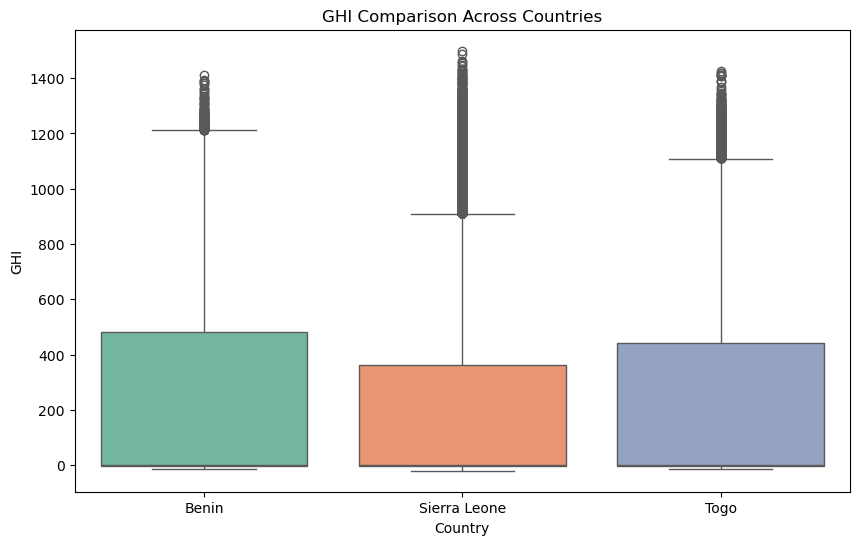

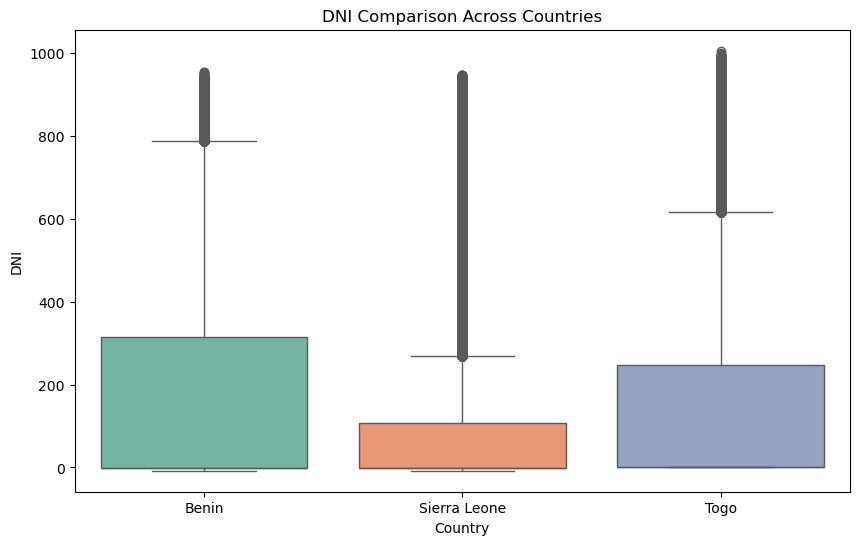

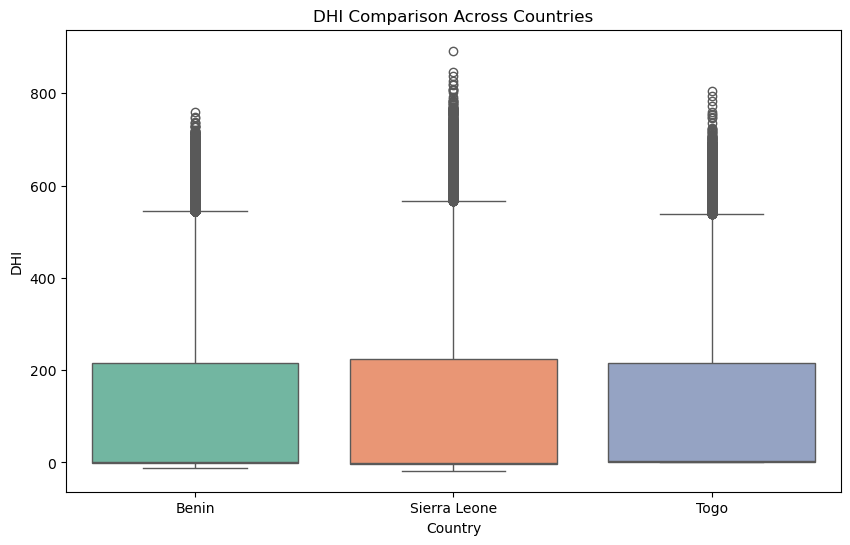


Summary Statistics:
                     GHI                            DNI                     \
                    mean median         std        mean median         std   
Country                                                                      
Benin         240.559452    1.8  331.131327  167.187516   -0.1  261.710501   
Sierra Leone  201.957515    0.3  298.495150  116.376337   -0.1  218.652659   
Togo          230.555040    2.1  322.532347  151.258469    0.0  250.956962   

                     DHI                     
                    mean median         std  
Country                                      
Benin         115.358961    1.6  158.691074  
Sierra Leone  113.720571   -0.1  158.946032  
Togo          116.444352    2.5  156.520714  


In [4]:
# metric comparison with box plots and summary table

## creating boxplots
# Concatenate the dataframes and add a 'Country' column

combined_df = pd.concat([
    dataframes['Benin'].assign(Country='Benin'),
    dataframes['Sierra Leone'].assign(Country='Sierra Leone'),
    dataframes['Togo'].assign(Country='Togo')
])

# Create boxplots for GHI, DNI, and DHI, with color differentiation

metrics = ['GHI', 'DNI', 'DHI']
for metric in metrics:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x='Country', y=metric, hue='Country', data=combined_df, palette='Set2') # Added hue and palette
    plt.title(f'{metric} Comparison Across Countries')
    plt.ylabel(metric)
    plt.xlabel('Country')
    plt.show()

## creating summary table
# Calculate summary statistics for each metric and country

summary_data = combined_df.groupby('Country')[['GHI', 'DNI', 'DHI']].agg(['mean', 'median', 'std'])

# Print the summary table
print("\nSummary Statistics:")
print(summary_data)


In [5]:
#Statistical Testing: using ANOVA on GHI values to assess whether differences between countries are significant.

'''ANOVA (Analysis of Variance) is a statistical test used to compare the means of two or more groups.  
It's a way to determine if there are any statistically significant differences between the average values of the groups.'''

from scipy import stats

# Perform one-way ANOVA on GHI
ghi_benin = dataframes['Benin']['GHI']
ghi_sierra_leone = dataframes['Sierra Leone']['GHI']
ghi_togo = dataframes['Togo']['GHI']

f_statistic, p_value = stats.f_oneway(ghi_benin, ghi_sierra_leone, ghi_togo)

print(f"\nOne-way ANOVA on GHI:")
print(f"F-statistic: {f_statistic:.3f}")
print(f"P-value: {p_value:.3f}")

# Interpretation of p-value
alpha = 0.05  # Significance level
if p_value < alpha:
    print("The differences in GHI between the countries are statistically significant.")
else:
    print("There is no significant difference in GHI between the countries.")




One-way ANOVA on GHI:
F-statistic: 2090.093
P-value: 0.000
The differences in GHI between the countries are statistically significant.


Key Observations:

* Benin shows the highest average GHI (240.56) and DHI (115.36), indicating strong overall solar potential. It also has the highest standard deviation for GHI (331.13), suggesting greater variability in its solar irradiance.
  
* Togo has the second highest average GHI (230.56) and DNI (151.26), with a slightly higher median GHI (2.1) than Benin, indicating consistent solar resources. Its standard deviation is also high (322.53), showing similar variability to Benin.

* Sierra Leone has the lowest average GHI (201.96) and DNI (116.38) among the three countries, suggesting comparatively lower solar potential, especially for direct solar energy. Its standard deviation for GHI (298.50) is slightly lower, implying slightly less variability than Benin and Togo.

*The ANOVA test (F-statistic: 2090.093, P-value: 0.000) confirms that the differences in GHI between these countries are statistically significant. This means the observed variations in solar potential are unlikely due to random chance.

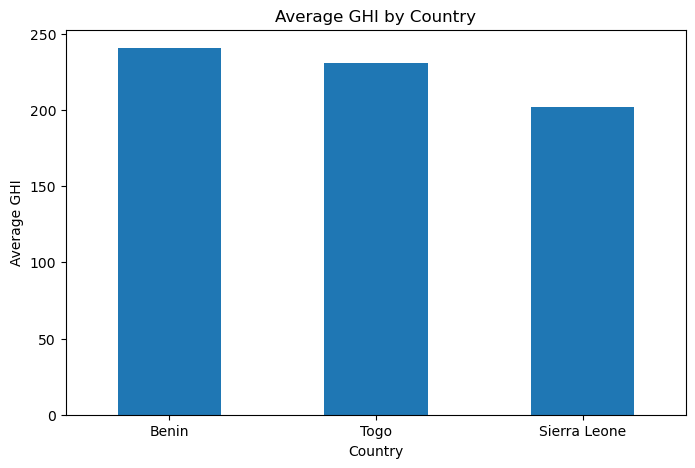


Ranking of Countries by Average GHI:
Country
Benin           240.559452
Togo            230.555040
Sierra Leone    201.957515
Name: GHI, dtype: float64


In [6]:
# Calculate average GHI for each country
avg_ghi = combined_df.groupby('Country')['GHI'].mean().sort_values(ascending=False)

# Create a bar chart
plt.figure(figsize=(8, 5))
avg_ghi.plot(kind='bar')
plt.title('Average GHI by Country')
plt.xlabel('Country')
plt.ylabel('Average GHI')
plt.xticks(rotation=0)
plt.show()

# Print the ranking
print("\nRanking of Countries by Average GHI:")
print(avg_ghi)